### Order in which code is to be ran

Dataset_preprocessing.ipynb --->  EDA.ipynb ---> Feature_Engineering.ipynb ---> models.ipynb ----> models.ipynb ----> neural-network.ipynb

Many Dataset files will be created in running this code could'nt submit those file of 50 mb zip file limit

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [18]:
X=pd.read_csv('Featured_engg_dataset\\train.csv')
y_train=X['Study Recruitment Rate']
X_train=X.drop(['Study Recruitment Rate'],axis=1)

In [19]:
X_train

,Enrollment_x_Age_OLDER_ADULT,Enrollment_x_Study Recruitment Rate,Study Status_COMPLETED_x_Study Recruitment Rate,Study Status_TERMINATED_x_Study Recruitment Rate,Sex_MALE_x_Study Recruitment Rate,"Age_ADULT, OLDER_ADULT_x_Study Recruitment Rate",Age_OLDER_ADULT_x_Study Recruitment Rate,Phases_PHASE1|PHASE2_x_Study Recruitment Rate,Phases_PHASE2_x_Study Recruitment Rate,Phases_PHASE3_x_Study Recruitment Rate,...,Phases_PHASE3 Study Recruitment Rate,Funder Type_INDIV Study Recruitment Rate,Funder Type_NIH Study Recruitment Rate,Brief Summary Sentiment Study Recruitment Rate,Conditions Sentiment Study Recruitment Rate,Primary Outcome Measures Sentiment Study Recruitment Rate,Secondary Outcome Measures Sentiment Study Recruitment Rate,Primary Completion Date Month Study Recruitment Rate,Primary Completion Date Day Study Recruitment Rate,Study Recruitment Rate^2
0,0.003963,-0.220414,1.936566,-1.524288,-1.030185,-4.992726,-0.226883,-1.026699,-2.147529,-1.739783,...,-1.739783,-0.055248,-0.183458,3.687911,7.199869,0.474175,0.998948,0.376090,4.993068,12.618917
1,0.003981,-0.369331,3.230229,-2.542542,-1.718368,-8.327964,-0.378445,-1.712554,-3.582120,-2.901992,...,-2.901992,-0.092154,-0.306012,0.904932,9.087695,-0.833354,-0.935621,-1.076638,-4.221628,35.109473
2,0.002373,-0.081156,-4.007331,5.091204,-0.633549,1.554353,-0.139530,-0.631406,-1.320701,-1.069943,...,-1.069943,-0.033977,-0.112824,2.451136,4.427820,-0.151297,-0.344956,2.116005,-0.631052,4.772575
3,0.004198,-0.045436,-1.268054,1.611028,-0.200476,0.491850,-0.044152,-0.199798,1.143486,-0.338566,...,-0.338566,-0.010751,-0.035701,-0.209460,-0.303288,0.158532,0.923769,0.470779,0.532407,0.477879
4,0.004144,-0.065779,0.552728,-0.435057,-0.294032,0.721379,-0.064756,-0.293037,-0.612941,-0.496563,...,-0.496563,-0.015769,-0.052362,2.646106,2.054963,-0.142596,-0.160095,1.565177,-0.292873,1.027971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12400,0.003602,-0.532294,5.146089,-4.050532,-2.737538,-13.267307,-0.602902,-2.728276,-5.706687,-4.623173,...,-4.623173,-0.146812,-0.487509,24.636155,-4.141449,-1.327619,-13.804223,-15.288142,-13.723288,89.107090
12401,0.002535,-0.261281,3.588326,-2.824403,-1.908863,4.683214,-0.420398,-1.902405,-3.979226,13.439610,...,13.439610,-0.102371,-0.339936,-3.511689,-2.887799,-1.928156,-3.732296,-8.767435,-0.507195,43.325283
12402,0.003909,-0.505258,4.500786,-3.542608,-2.394260,-11.603629,-0.527300,-2.386159,-4.991087,-4.043442,...,-4.043442,-0.128402,-0.426377,21.546860,-3.622125,-1.161139,-1.303632,-8.622681,9.855769,68.160750
12403,0.004053,-0.016486,0.141615,-0.111467,-0.075334,0.184825,-0.016591,-0.075079,-0.157042,-0.127225,...,-0.127225,-0.004040,-0.013416,-0.056935,-0.113968,-0.036535,-0.345992,0.102205,0.145045,0.067480


In [20]:
y_train

0        3.552311
1        5.925325
2        2.184622
3        0.691288
4        1.013889
           ...   
12400    9.439655
12401    6.582194
12402    8.255952
12403    0.259770
12404    0.077594
Name: Study Recruitment Rate, Length: 12405, dtype: float64

In [21]:
X=pd.read_csv('/kaggle/input/novartis-1/val.csv')
y_val=X['Study Recruitment Rate']
X_val=X.drop(['Study Recruitment Rate'],axis=1)

In [22]:
X_val=X_val.drop(['Study Recruitment Rate^2'],axis=1)

In [23]:
X_train=X_train.drop(['Study Recruitment Rate^2'],axis=1)

This function create_model builds and compiles a neural network model using Keras. It takes the input dimension (input_dim), a list of layer sizes (layers), an activation function (activation), and a learning rate (learning_rate). The model is sequentially constructed with the specified number of layers and nodes, using the given activation function. The output layer has a single node with a linear activation function. The model is compiled with the Adam optimizer, mean squared error loss, and mean absolute error as a metric. The function returns the compiled model.

In [24]:
def create_model(input_dim, layers, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for nodes in layers:
        model.add(Dense(nodes, activation=activation))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model


In [25]:
nn_models = {
    'Model 1': [64, 32],
    'Model 2': [128, 64, 32],
    'Model 3': [256, 128, 64, 32]
}


In [26]:
results = []
best_model = None
best_mse = float('inf')

This code iterates over a dictionary of neural network models (nn_models), where each key is a model name and each value is a list of layer sizes. For each model, it creates a neural network using the create_model function, trains it on the training data (X_train, y_train), and validates it on the validation data (X_val, y_val). After training, it predicts the validation targets, calculates the mean squared error (MSE), mean absolute error (MAE), and R² score, and appends these results to a list. It also keeps track of the model with the best (lowest) MSE.

In [27]:
for model_name, layers in nn_models.items():
    model = create_model(X_train.shape[1], layers)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results.append({
        'Model': model_name,
        'Layers': layers,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })
    
    if mse < best_mse:
        best_mse = mse
        best_model = model


Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 106846.2422 - mean_absolute_error: 6.3855 - val_loss: 372.3921 - val_mean_absolute_error: 1.4266
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4219.7749 - mean_absolute_error: 2.0868 - val_loss: 408.9873 - val_mean_absolute_error: 1.4829
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25292.4668 - mean_absolute_error: 3.5148 - val_loss: 1655.1324 - val_mean_absolute_error: 1.9262
Epoch 4/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105318.6172 - mean_absolute_error: 6.6900 - val_loss: 1167.1027 - val_mean_absolute_error: 1.6502
Epoch 5/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 320880.0625 - mean_absolute_error: 8.8264 - val_loss: 435.9350 - val_mean_absolute_error: 1.7436
Epoch 6/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 711.6398 - mean_absolute_error: 1.8485 - val_loss: 11.0555 - val_mean_absolute_error: 1.0409
Epoch 7/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [28]:
results_df = pd.DataFrame(results)
print(results_df)

     Model              Layers        MSE       MAE        R²
0  Model 1            [64, 32]  17.975835  0.544652  0.989798
1  Model 2       [128, 64, 32]  31.094106  0.541916  0.982353
2  Model 3  [256, 128, 64, 32]  18.860276  1.061826  0.989296


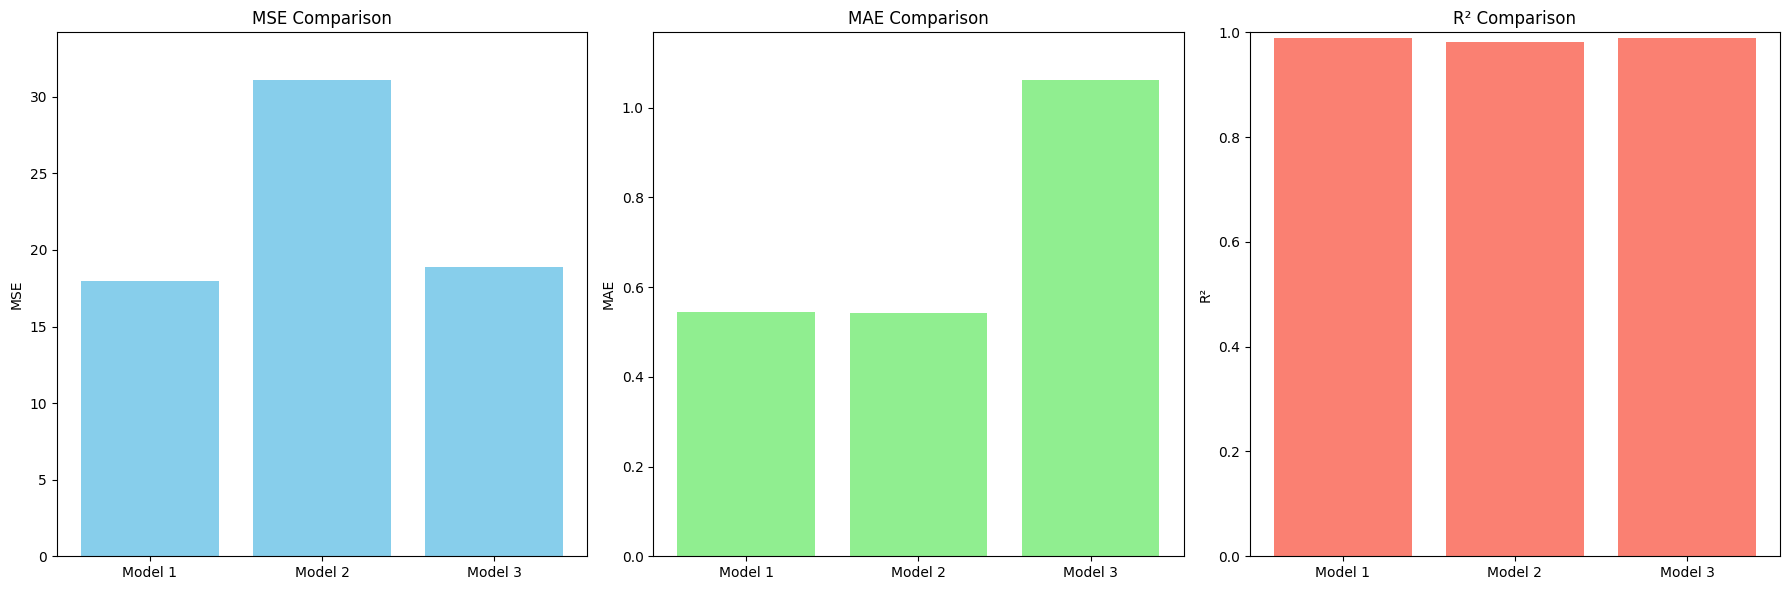

In [6]:


data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Layers': ['[64, 32]', '[128, 64, 32]', '[256, 128, 64, 32]'],
    'MSE': [17.975835, 31.094106, 18.860276],
    'MAE': [0.544652, 0.541916, 1.061826],
    'R²': [0.989798, 0.982353, 0.989296]
}

df = pd.DataFrame(data)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(df['Model'], df['MSE'], color='skyblue')
axs[0].set_title('MSE Comparison')
axs[0].set_ylabel('MSE')
axs[0].set_ylim(0, max(df['MSE']) * 1.1)

axs[1].bar(df['Model'], df['MAE'], color='lightgreen')
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')
axs[1].set_ylim(0, max(df['MAE']) * 1.1)

axs[2].bar(df['Model'], df['R²'], color='salmon')
axs[2].set_title('R² Comparison')
axs[2].set_ylabel('R²')
axs[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [30]:
X=pd.read_csv('/kaggle/input/novartis-1/test.csv')
y_test=X['Study Recruitment Rate']
X_test=X.drop(['Study Recruitment Rate'],axis=1)

In [34]:
X_test=X_test.drop(['Study Recruitment Rate^2'],axis=1)

In [35]:
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Best Hypertuned Neural Network Model/Overall Best Model

In [36]:
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')

Test MSE: 20.147625134719792
Test MAE: 0.5633442447694545
Test R²: 0.9808395450093114


Neural Network Model beats Random forest on Test Set!!!
